# MedleyDB content analysis and instrumental based remix 

This notebook contains the MedleyDB instrumental and genre analysis to selection of most representative instrumental families in its musical content.

## 1. Selection of singed pieces

For my studies, I use the definition of singing voice as the following: (???)
    - female and male singers
    - vocalists
    - choir

In [27]:
sing_voice = ["AClassicEducation_NightOwl","AimeeNorwich_Child","AlexanderRoss_GoodbyeBolero",
              "AlexanderRoss_VelvetCurtain","Auctioneer_OurFutureFaces","AvaLuna_Waterduct",
              "BigTroubles_Phantom","BrandonWebster_DontHearAThing","BrandonWebster_YesSirICanFly",
              "CelestialShore_DieForUs","ClaraBerryAndWooldog_AirTraffic","ClaraBerryAndWooldog_Boys",
              "ClaraBerryAndWooldog_Stella","ClaraBerryAndWooldog_TheBadGuys","ClaraBerryAndWooldog_WaltzForMyVictims",
              "Creepoid_OldTree","Debussy_LenfantProdigue","DreamersOfTheGhetto_HeavyLove","FacesOnFilm_WaitingForGa",
              "FamilyBand_Again","Handel_TornamiAVagheggiar","HeladoNegro_MitadDelMundo","HezekiahJones_BorrowedHeart",
              "HopAlong_SisterCities","InvisibleFamiliars_DisturbingWildlife","LizNelson_Coldwar",
              "LizNelson_ImComingHome"] # essa ultima não tem algo com mais de 2 (ver o que é... Não fez a do novocal)
              
sing=  ["LizNelson_Rainfall","MatthewEntwistle_DontYouEver","MatthewEntwistle_Lontano",
              "Meaxic_TakeAStep","Meaxic_YouListen","Mozart_BesterJungling","Mozart_DiesBildnis","MusicDelta_80sRock",
              "MusicDelta_Beatles","MusicDelta_Britpop","MusicDelta_Country1","MusicDelta_Country2","MusicDelta_Disco",
              "MusicDelta_Gospel","MusicDelta_Grunge","MusicDelta_Hendrix","MusicDelta_Punk","MusicDelta_Reggae",
              "MusicDelta_Rock","MusicDelta_Rockabilly","NightPanther_Fire","PortStWillow_StayEven","PurlingHiss_Lolita",
              "Schubert_Erstarrung","Schumann_Mignon","SecretMountains_HighHorse","Snowmine_Curfews",
              "StevenClark_Bounty","StrandOfOaks_Spacestation","SweetLights_YouLetMeDown","TheDistricts_Vermont",
              "TheScarletBrand_LesFleursDuMal","TheSoSoGlos_Emergency","Wolf_DieBekherte"]

In [28]:
singed = sing_voice+sing

## 2. Generate remixes predefined on MedleyDB API


### O detector é sensível à mudança de instrumentação?

 Avaliar resultados em músicas com diferentes instrumentações
 
 _Mixar uma música com diferentes instrumentações (se possível, com instrumentações similares para diferentes músicas)_ 
 
Sugestões:
 - Apenas instrumentos melódicos
 - Apenas instrumentos monofônicos
 - Apenas instrumentos monofônicos + percussivos
 - Sem vocais (todos as fontes)
 - Conjuntos personalizados de instrumentos

In [2]:
def generate_mixes(piece_name):
    # Load all multitracks
    mtrack_generator = mdb.load_all_multitracks()

    mtrack = mdb.MultiTrack(piece_name)

    print ("Stems of the piece:", piece_name)
    for stem in mtrack.stems.values():
        print (stem.instrument)
        
    outpath = "/home/shayenne/Documents/Mestrado/MedleyDBMIX/"

    dir_name = outpath+piece_name
    try: 
        os.mkdir(dir_name)
        print("Directory " , dir_name ,  " created ") 
    except FileExistsError:
        print("Directory " , dir_name ,  " already exists")

    #filepaths, weights = medleydb.mix.mix_multitrack(mtrack, "test.wav", stem_indices=[1,2,3,5])
    filepath = outpath+piece_name+"/"+piece_name
    
    filepaths, weights = medleydb.mix.mix_melody_stems(mtrack, filepath+"_melody.wav")
    filepaths, weights = medleydb.mix.mix_mono_stems(mtrack, filepath+"_mono.wav")
    filepaths, weights = medleydb.mix.mix_mono_stems(mtrack, filepath+"_mono_drums.wav", include_percussion=True)
    track_idx = medleydb.mix.mix_no_vocals(mtrack, filepath+"_novocal.wav")
    print ("Generated all mixes defined for", piece_name)

In [3]:
# for piece in sing:
#     generate_mixes(piece)

## 3. Experiment

In [21]:
# Load all multitracks
mtrack_generator = mdb.load_all_multitracks()

piece_name = 'CelestialShore_DieForUs'

mtrack = mdb.MultiTrack(piece_name)

for stem in mtrack.stems.values():
    print (stem.instrument)
    
sources = ['male singer','female singer','synthesizer','clean electric guitar']
output_path = "~/shayenne/FirstTrySources.wav"
mix_specifc_sources(mtrack, output_path, sources)

['male singer']
['female singer']
['electric bass']
['synthesizer']
['clean electric guitar']
['drum set']
['tack piano']
['clean electric guitar']
['synthesizer']
~/shayenne/FirstTrySources.wav


TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [ ]:
medleydb.multitrack.get_valid_instrument_labels()

In [7]:
# Select a set with the same instruments to evaluate the instrumentation
instrument = "piano"
inst_list = medleydb.utils.get_files_for_instrument(instrument,multitrack_list=mtrack_generator)

In [30]:
# # Generators are finite (Use just once, run all cells if you want to recharge it again)
# for file in inst_list:
#     print (file)

## Dataset statistics

Construimos um dataframe com informações sobre o banco de dados para avaliar quais tipos de experimentos serão úteis utilizando seus dados.
 

In [7]:
import medleydb as mdb
import medleydb.mix
import seaborn as sns
import pandas as pd
import os

### Criação dos dataframes

In [9]:
# Load all multitracks
mtrack_generator = mdb.load_all_multitracks()

piece_stems = {}
df_pieces = pd.DataFrame(columns=['track_id', 'artist', 'title', 'genre', 'has_melody', 'is_instrumental'])
df = pd.DataFrame(columns=['track_id', 'instrument', 'family', 'is_instrumental'])

inst_family = {'percussion': ['drum set', 'tambourine', 'timpani', 'tabla', 'snare drum', 'glockenspiel', 'kick drum', 'auxiliary percussion', 'vibraphone'], 
               'plucked strings': ['electric bass', 'mandolin', 'distorted electric guitar', 'clean electric guitar', 'acoustic guitar', 'banjo'],
               'electronics': ['synthesizer', 'fx/processed sound'],
               'voice': ["male singer", "female singer", "male speaker", "female speaker", "male rapper", "female rapper", "beatboxing", "vocalists"],
               'strings': ['cello', 'violin section', 'string section', 'viola section'],
               'windwood': ['flute', 'clarinet', 'harmonica', 'tenor saxophone'],
               'brass': ['trumpet section', 'horn section', 'brass section'],
               'piano': ['piano', 'tack piano', 'melodica']
              }
real_family = None

for mtrack in mtrack_generator:
    
    piece_stems[mtrack.track_id] = []
    
    #print ("Stems of the piece saved:", mtrack.track_id)
    df_pieces.loc[len(df_pieces)] = [mtrack.track_id, mtrack.artist, mtrack.title, mtrack.genre, mtrack.has_melody, mtrack.is_instrumental]
    
    for stem in mtrack.stems.values():
        real_family = 'Not Defined'
        piece_stems[mtrack.track_id].append(stem.instrument)
        
        for family, instruments in inst_family.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
            
            if stem.instrument[0] in instruments:
                real_family = family
        
        df = df.append({'track_id': mtrack.track_id, 'instrument': stem.instrument[0], 'family': real_family, 'is_instrumental': mtrack.is_instrumental}, ignore_index=True)
        #print (stem.instrument)

In [10]:
df.head()

,track_id,instrument,family,is_instrumental
0,AClassicEducation_NightOwl,electric bass,plucked strings,False
1,AClassicEducation_NightOwl,drum set,percussion,False
2,AClassicEducation_NightOwl,distorted electric guitar,plucked strings,False
3,AClassicEducation_NightOwl,distorted electric guitar,plucked strings,False
4,AClassicEducation_NightOwl,clean electric guitar,plucked strings,False


In [11]:
df_pieces.head()

,track_id,artist,title,genre,has_melody,is_instrumental
0,AClassicEducation_NightOwl,AClassicEducation,NightOwl,Singer/Songwriter,True,False
1,AimeeNorwich_Child,AimeeNorwich,Child,Singer/Songwriter,True,False
2,AimeeNorwich_Flying,AimeeNorwich,Flying,World/Folk,True,True
3,AlexanderRoss_GoodbyeBolero,AlexanderRoss,GoodbyeBolero,Singer/Songwriter,True,False
4,AlexanderRoss_VelvetCurtain,AlexanderRoss,VelvetCurtain,Singer/Songwriter,True,False


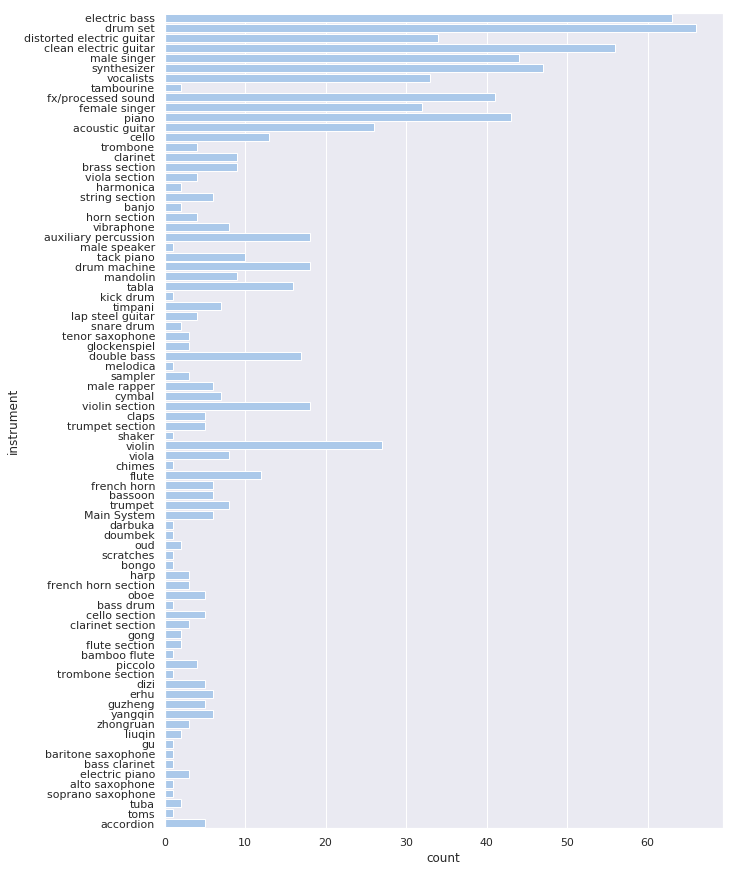

In [7]:
sns.set(rc={'figure.figsize':(10,15)})
sns.set_color_codes("pastel")
sns.countplot(y='instrument', data=df, color="b")

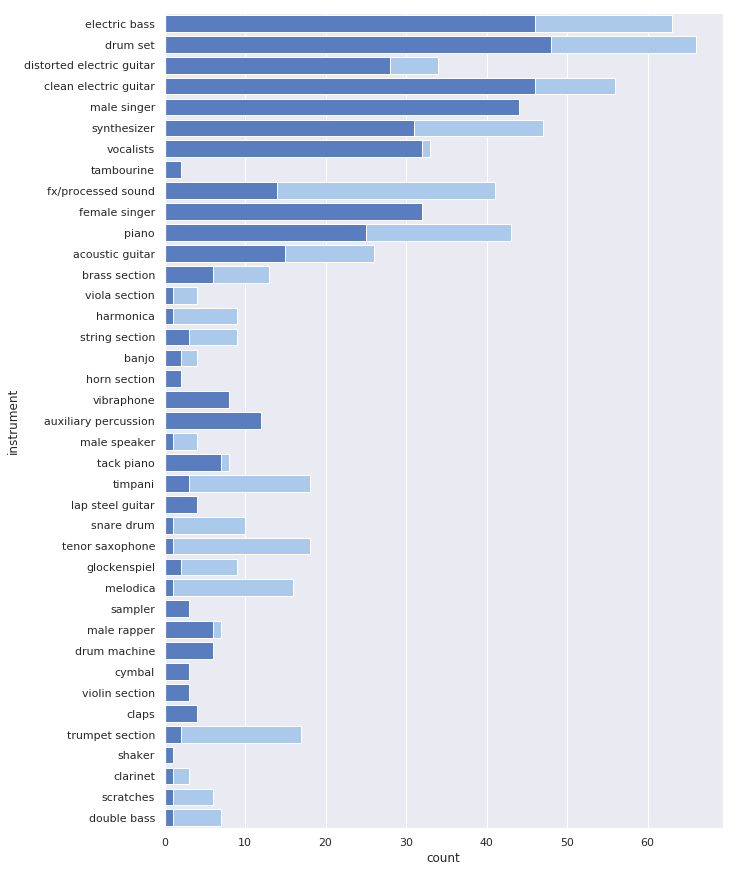

In [10]:
sns.set(rc={'figure.figsize':(10,15)})

df2 = df.where(df.is_instrumental == 0)

sns.set_color_codes("pastel")
sns.countplot(y='instrument', data=df, color="b")
sns.set_color_codes("muted")
sns.countplot(y="instrument", data=df2,  color="b")

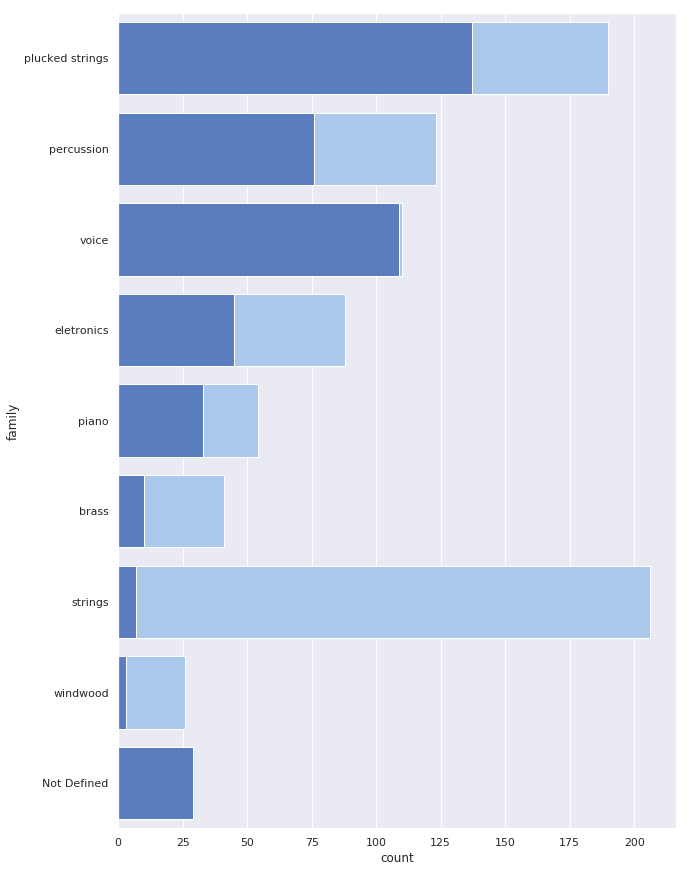

In [52]:
sns.set(rc={'figure.figsize':(10,15)})

df2 = df.where(df.is_instrumental == 0)

sns.set_color_codes("pastel")
sns.countplot(y='family', data=df, color="b")
sns.set_color_codes("muted")
sns.countplot(y="family", data=df2,  color="b")

In [45]:
# groups_inst = df.groupby(['track_id', 'is_instrumental'])

In [46]:
# sns.countplot(y='artist', hue='is_instrumental', data=df_pieces)

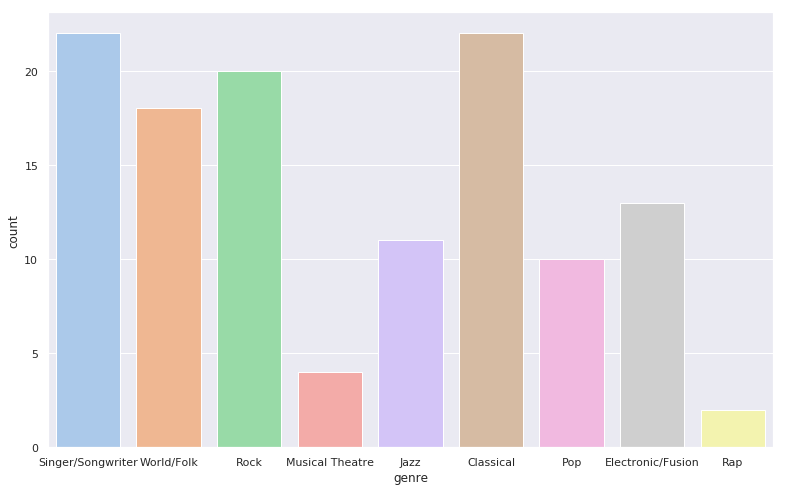

In [53]:
sns.set(rc={'figure.figsize':(13,8)})

sns.set_color_codes("pastel")
sns.countplot(x='genre', data=df_pieces, palette='pastel')

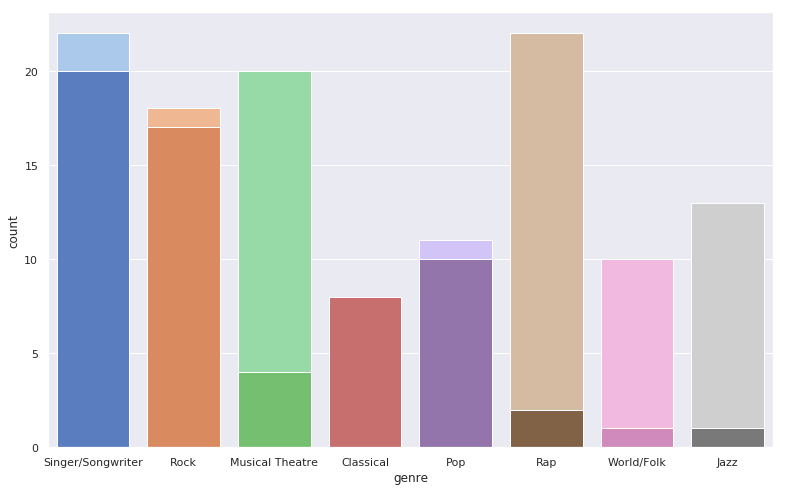

In [54]:
sns.set(rc={'figure.figsize':(13,8)})

df_pieces2 = df_pieces.where(df_pieces.is_instrumental == 0)

sns.set_color_codes("pastel")
sns.countplot(x='genre', data=df_pieces, palette='pastel')

sns.set_color_codes("muted")
sns.countplot(x='genre', data=df_pieces2, palette='muted')

## Mix specific groups of instrumentation

Groups defined by the families.

In [20]:
def mix_specifc_sources(mtrack, output_path, sources):
    """Remixes a multitrack with all stems in sources.
    Parameters
    ----------
    mtrack : Multitrack
        Multitrack object
    output_path : str
        Path to save output file.
    sources : list
        List of sources desired in mix.
    Returns
    -------
    stem_indices : list
        List of stem indices used in mix.
    """
    print (output_path)
    stems = mtrack.stems
    stem_indices = []
    for i in stems.keys():
        present = all([inst in sources for inst in stems[i].instrument])
        if present:
            stem_indices.append(i)

    medleydb.mix.mix_multitrack(mtrack, "texte.wav", stem_indices=stem_indices)
    return stem_indices

In [24]:
mtrack_generator = mdb.load_all_multitracks()

families = ['electronics', 'piano', #'orchestra',
            'plucked strings', 'percussion']

# Get all singed pieces and remix with one specific family and the voiced stems
# If there is no source from one family, do not make a new remix
for piece in singed:

    mtrack = mdb.MultiTrack(piece)
    
    for family in families:
        
        output_path = piece+'_'+family+'_voiced.wav'
    
        sources = inst_family[family]

        indices = mix_specifc_sources(mtrack, output_path, sources)
        print (indices) # Ver se isso é None quando não tem as fontes da família. Se sim, usar isso para evitar a mixagem.

AClassicEducation_NightOwl_electronics_voiced.wav


TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType